In [2]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

# Import TCGA melanoma data 
## Rna read data
file='../data/counts.txt'
with open(file, 'rt') as f: 
    read_counts=pd.read_csv(f,index_col=0) 

In [4]:
counts=read_counts.values

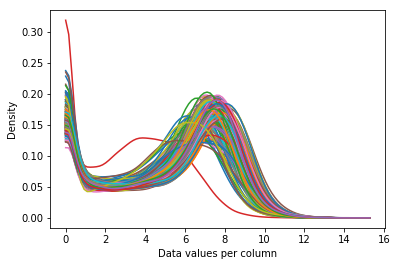

In [3]:
def plot_col_density(data):
    
    density_per_col=[stats.gaussian_kde(col) for col in data.T]
    x=np.linspace(np.min(data),np.max(data),100)
    
    fix,ax=plt.subplots()
    
    for density in density_per_col:
        ax.plot(x, density(x))
    ax.set_xlabel('Data values per column')
    ax.set_ylabel('Density')

log_counts=np.log(counts +1)
plot_col_density(log_counts)
        

In [4]:
def quantile_norm(X):
    """
    
    Normalize each X column (sample) to have SAME distribution
    
    Parameters 
    ..........
    
    X: 2D array of flaot shape (m,n)
    
    Returns 
    ..........
    
    Xn: 2D array of float shape (m,n)
        data normalized
    
    """

    ## compute quantiles
    
    quantiles=np.mean(np.sort(X,axis=0),axis=1) ## sort the values by row, thn calculate the mean by column 
    
    ranks=np.apply_along_axis(stats.rankdata,0,X)
    
    ## 
    rank_indices=ranks.astype(int)-1
    
    Xn=quantiles[rank_indices]
    
    return Xn

def quantile_norm_log(x):
    logx=np.log(x+1)
    logxn=quantile_norm(logx)
    return logxn

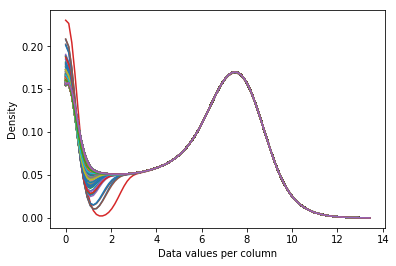

In [5]:
log_counts_normalized=quantile_norm_log(counts)
plot_col_density(log_counts_normalized)

In [13]:
read_counts
np.mean(np.sort(counts,axis=0),axis=1).shape

# quantiles=np.mean(np.sort(counts,axis=0),axis=1) 

,00624286-41dd-476f-a63b-d2a5f484bb45,TCGA-FS-A1Z0,TCGA-D9-A3Z1,02c76d24-f1d2-4029-95b4-8be3bda8fdbe,TCGA-EB-A51B,TCGA-D3-A1Q3,TCGA-FR-A44A,TCGA-EE-A17Z,TCGA-D3-A51G,TCGA-D3-A51E,...,TCGA-D9-A149,TCGA-EE-A3AG,TCGA-D9-A4Z2,TCGA-EB-A4OZ,TCGA-EE-A3J4,TCGA-FS-A1ZM,TCGA-D3-A5GS,TCGA-EB-A3XF,TCGA-EE-A2GE,ff7431a9-243a-4651-80bb-096379925bbe
A1BG,1272.36,452.96,288.06,400.11,420.46,877.59,402.77,559.20,269.59,586.66,...,631.78,560.60,846.55,678.00,32.88,997.41,256.93,461.60,634.06,530.36
A1CF,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
A2BP1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
A2LD1,164.38,552.43,201.83,165.12,95.75,636.63,241.56,30.82,105.44,239.19,...,218.47,274.45,770.04,71.74,17.00,194.26,156.81,84.35,242.01,377.03
A2ML1,27.00,0.00,0.00,0.00,8.00,0.00,1.00,763.00,0.00,0.00,...,3.00,6.00,0.00,1043.00,1.00,852.00,4.00,587.00,0.00,2.00
A2M,65232.35,61911.87,99195.94,12880.89,83380.84,39417.73,358068.86,16470.99,320261.89,162625.78,...,22861.93,28221.61,87252.65,9300.02,103333.98,1222615.54,70911.72,85091.90,253599.66,71228.78
A4GALT,190.00,213.00,103.00,752.00,38.00,301.00,424.00,97.00,693.00,99.00,...,160.00,1020.00,177.00,369.00,99.00,422.00,154.00,81.00,1210.00,380.00
A4GNT,5.00,0.00,1.00,1.00,0.00,3.00,2.00,0.00,20.00,3.00,...,1.00,1.00,6.00,0.00,0.00,8.00,1.00,0.00,2.00,1.00
AAA1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
AAAS,2449.00,2181.00,1203.00,1440.00,1646.00,3353.00,2422.00,1357.00,1617.00,2097.00,...,3484.00,5248.00,3275.00,1798.00,2325.00,2784.00,2430.00,1932.00,2613.00,2243.00
